<a href="https://colab.research.google.com/github/mark-polo/machine-learning/blob/main/fossil_zindi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Надані дані містять кількість проданих одиниць кожного товару (або SKU) щомісяця. Набір даних також містить деякі відомості щодо кількості товарів, проданих через кожен основний канал. Канали є клієнтами Fossil. Канал може бути онлайн-продавцем, особистою роздрібною мережею магазинів тощо. Існують інші незначні канали, які не представлені в наборі даних як канал, але загальний обсяг продажів представляє всі продажі в основних каналах, а також менших каналах.

Надані дані також містять дані про запаси, такі як початок періоду (BOP), або початок, запаси (запаси, наявні на початок місяця) і наявні запаси або запаси на стороні клієнта (запаси, доступні через клієнтів або канали).

Мета полягає в тому, щоб точно передбачити «sellin», який є оптимальним інвентарем, необхідним для задоволення попиту Fossil на власних клієнтів або каналів на чотири місяці в майбутньому.


In [ ]:
! pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 690 kB 4.2 MB/s 


In [ ]:
! gdown --id 1zVGltWQ3_mfJ7Y28jbWfn2_KUA2S4Ddn

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1zVGltWQ3_mfJ7Y28jbWfn2_KUA2S4Ddn
To: /content/Train.csv
100% 7.73M/7.73M [00:00<00:00, 44.1MB/s]


In [ ]:
! gdown --id 1d65J6a-OGeGRBeadRJ_blVLHX93mHqUF

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1d65J6a-OGeGRBeadRJ_blVLHX93mHqUF
To: /content/Test.csv
100% 42.1k/42.1k [00:00<00:00, 49.6MB/s]


In [ ]:
! gdown --id 10p6h4yM4oWmwp1XdkIdNzAEc4vvEAA0-

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=10p6h4yM4oWmwp1XdkIdNzAEc4vvEAA0-
To: /content/DataDictionary.csv
100% 2.89k/2.89k [00:00<00:00, 4.60MB/s]


In [ ]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 50)

In [ ]:
train = pd.read_csv("/content/Train.csv")

In [ ]:
train

,sku_name,starting_inventory,sellin,sellin_channel_1,sellin_channel_2,sellin_channel_3,sellin_channel_4,sellin_channel_5,sellin_channel_6,sellin_channel_7,sellin_channel_8,sellout,onhand_inventory,leftover_inventory,sellout_channel_1,sellout_channel_2,sellout_channel_3,sellout_channel_4,sellout_channel_5,sellout_channel_6,sellout_channel_7,sellout_channel_8,sellout_channel_9,sellout_channel_10,onhand_inventory_channel_1,onhand_inventory_channel_2,onhand_inventory_channel_3,onhand_inventory_channel_4,onhand_inventory_channel_5,onhand_inventory_channel_6,onhand_inventory_channel_7,onhand_inventory_channel_8,onhand_inventory_channel_9,onhand_inventory_channel_10,price,month,year,product_lifecycle_stage,FLAG100,disc_month,cum_disc,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,Weeks
0,YOSHWARDTERR,0,1013,0,0,0,1013,0,0,0,0,1013,0,0,0,0,0,1013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,7,2016,U,0.000000,0,0,0,1,0,1
1,YOSHWARDTERR,0,2026,0,0,0,2026,0,0,0,0,0,1013,2026,0,0,0,0,0,0,0,0,0,0,0,0,0,1013,0,0,0,0,0,0,95,2,2017,U,0.000000,0,0,0,1,0,0
2,YOSHWARDTERR,0,1013,0,0,0,1013,0,0,0,0,1013,0,0,0,0,0,1013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,95,5,2017,U,0.000000,0,0,0,1,0,0
3,YOSHUANEMARX,0,320108,4052,40520,240081,4052,6078,18234,0,0,56728,259328,263380,0,1013,43559,0,0,12156,0,0,0,0,0,39507,190444,6078,0,0,0,0,0,23299,155,4,2018,W,0.270966,1,1,0,0,1,1
4,YOSHUANEMARX,0,132703,2026,0,81040,3039,25325,18234,0,0,90157,270471,42546,0,3039,69897,6078,0,8104,0,0,0,3039,0,36468,202600,3039,0,0,0,7091,0,21273,155,5,2018,W,0.063004,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44902,ABEAHAMASHL,432551,156002,101300,10130,0,0,0,1013,0,9117,25325,291744,130677,20260,0,-2026,5065,1013,1013,0,0,0,0,277562,0,3039,9117,1013,0,0,0,0,1013,149,6,2021,W,0.000000,0,0,0,0,1,0
44903,ABEAHAMASHL,406213,34442,6078,0,0,0,0,4052,0,21273,38494,396083,-4052,36468,0,-1013,0,1013,4052,0,0,0,-2026,386966,0,2026,6078,0,0,0,0,0,1013,149,7,2021,W,0.333333,0,0,0,0,1,0
44904,ABEAHAMASHL,375823,38494,0,0,0,24312,0,14182,0,0,56728,274523,-18234,34442,0,0,8104,0,13169,0,0,0,1013,253250,0,2026,18234,0,0,0,0,0,1013,149,8,2021,W,0.400000,1,1,0,0,1,1
44905,ABEAHAMASHL,400135,29377,1013,0,0,1013,0,6078,0,21273,65845,123586,-36468,55715,0,-1013,6078,0,5065,0,0,0,0,111430,0,2026,9117,0,0,0,0,0,1013,149,9,2021,W,0.000000,0,1,0,0,1,0


In [ ]:
test = pd.read_csv("/content/Test.csv")

In [ ]:
test

,sku_name,month,year,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN
0,YOSHTLYNYOSHZZ,11,2021,0,1,0
1,YOSHTLYNYOSHZZ,12,2021,0,1,0
2,YOSHTLYNYOSHZZ,1,2022,0,1,0
3,YOSHTLYNYOSHZZ,2,2022,0,1,0
4,YOSHRENECARL,11,2021,0,0,1
...,...,...,...,...,...,...
1523,ABEENNEARMAZZ,2,2022,0,0,1
1524,ABEAHAMASHL,11,2021,0,0,1
1525,ABEAHAMASHL,12,2021,0,0,1
1526,ABEAHAMASHL,1,2022,0,0,1


# **EDA**

In [ ]:
train.isna().mean().sort_values(ascending=False)

sku_name                       0.0
sellout_channel_10             0.0
onhand_inventory_channel_2     0.0
onhand_inventory_channel_3     0.0
onhand_inventory_channel_4     0.0
onhand_inventory_channel_5     0.0
onhand_inventory_channel_6     0.0
onhand_inventory_channel_7     0.0
onhand_inventory_channel_8     0.0
onhand_inventory_channel_9     0.0
onhand_inventory_channel_10    0.0
price                          0.0
month                          0.0
year                           0.0
product_lifecycle_stage        0.0
FLAG100                        0.0
disc_month                     0.0
cum_disc                       0.0
CAT_GENDER_BOTH                0.0
CAT_GENDER_MEN                 0.0
CAT_GENDER_WOMEN               0.0
onhand_inventory_channel_1     0.0
sellout_channel_9              0.0
starting_inventory             0.0
sellout_channel_8              0.0
sellin                         0.0
sellin_channel_1               0.0
sellin_channel_2               0.0
sellin_channel_3    

In [ ]:
train.describe(include="all")

,sku_name,starting_inventory,sellin,sellin_channel_1,sellin_channel_2,sellin_channel_3,sellin_channel_4,sellin_channel_5,sellin_channel_6,sellin_channel_7,sellin_channel_8,sellout,onhand_inventory,leftover_inventory,sellout_channel_1,sellout_channel_2,sellout_channel_3,sellout_channel_4,sellout_channel_5,sellout_channel_6,sellout_channel_7,sellout_channel_8,sellout_channel_9,sellout_channel_10,onhand_inventory_channel_1,onhand_inventory_channel_2,onhand_inventory_channel_3,onhand_inventory_channel_4,onhand_inventory_channel_5,onhand_inventory_channel_6,onhand_inventory_channel_7,onhand_inventory_channel_8,onhand_inventory_channel_9,onhand_inventory_channel_10,price,month,year,product_lifecycle_stage,FLAG100,disc_month,cum_disc,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,Weeks
count,44907,4.490700e+04,4.490700e+04,4.490700e+04,4.490700e+04,4.490700e+04,4.490700e+04,44907.000000,4.490700e+04,4.490700e+04,4.490700e+04,4.490700e+04,4.490700e+04,4.490700e+04,4.490700e+04,44907.000000,44907.000000,4.490700e+04,44907.000000,4.490700e+04,44907.000000,44907.000000,44907.000000,44907.000000,4.490700e+04,4.490700e+04,4.490700e+04,4.490700e+04,44907.000000,44907.0,4.490700e+04,44907.000000,44907.000000,44907.000000,44907.000000,44907.000000,44907.000000,44907,44907.000000,44907.000000,44907.000000,44907.000000,44907.000000,44907.000000,44907.000000
unique,3868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BRITEIDALAKE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.648297e+05,2.469533e+05,1.307605e+05,3.396829e+04,2.309661e+04,1.484062e+04,9593.847863,8.523664e+03,7.648266e+03,5.769433e+03,1.487073e+05,7.355678e+05,9.824593e+04,7.713255e+04,11423.054223,18712.065981,1.858051e+04,6575.826553,5.870446e+03,3618.981807,569.041308,1649.398691,4575.474692,4.025671e+05,6.823409e+04,1.037787e+05,6.407817e+04,34814.202552,0.0,1.572348e+04,3470.687287,10724.554101,32186.407420,138.974815,6.495068,2017.872759,NaN,0.050180,0.123366,0.274924,0.012648,0.448037,0.539315,0.343733
std,NaN,1.307197e+06,5.396038e+05,3.671458e+05,1.016882e+05,6.618159e+04,1.018736e+05,42555.114234,3.072036e+04,4.096964e+04,4.092453e+04,3.446351e+05,1.264808e+06,3.896904e+05,2.576446e+05,27525.403417,40289.320846,8.705091e+04,17649.686982,2.425491e+04,13136.471159,1649.035377,6567.872377,11208.507419,9.069368e+05,1.319811e+05,1.645399e+05,2.076023e+05,76623.436604,0.0,4.943390e+04,7128.146054,38132.614829,62467.187664,35.100336,3.356170,1.626007,NaN,0.128661,0.328861,0.446481,0.111753,0.497298,0.498458,0.474958
min,NaN,0.000000e+00,-1.013000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1.013000e+03,0.000000e+00,0.000000e+00,-6.787100e+04,-1.722100e+04,-9.177780e+06,-7.091000e+03,-9117.000000,-27351.000000,-6.078000e+03,-1013.000000,-6.989700e+04,-1013.000000,-2026.000000,-2026.000000,-8104.000000,-1.013000e+03,0.000000e+00,-7.192300e+04,-1.722100e+04,0.000000,0.0,0.000000e+00,0.000000,0.000000,-2026.000000,45.000000,1.000000,2016.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000e+00,2.026000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.065000e+03,2.937700e+04,-1.823400e+04,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.013000e+03,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,115.000000,4.000000,2016.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.000000e+00,2.228600e+

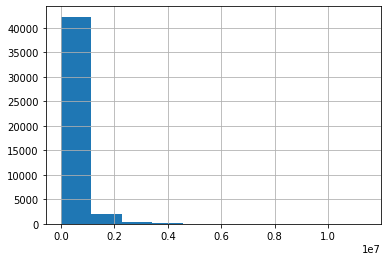

In [ ]:
train["sellin"].hist()

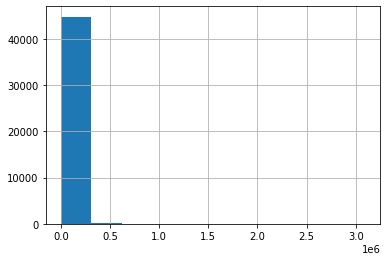

In [ ]:
train["sellin_channel_7"].hist()

In [ ]:
train["CAT_GENDER_MEN"].value_counts()

0    24787
1    20120
Name: CAT_GENDER_MEN, dtype: int64

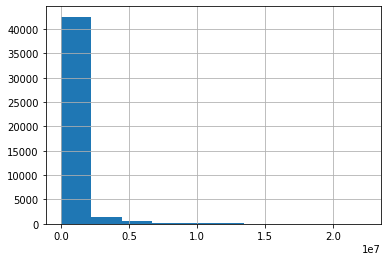

In [ ]:
train["starting_inventory"].hist()

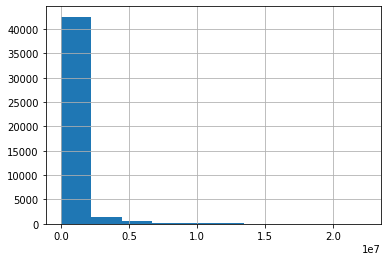

In [ ]:
train["starting_inventory"].hist()

In [ ]:
train["starting_inventory_bin"] = pd.qcut(train["starting_inventory"], 5, duplicates="drop")

In [ ]:
train.groupby("starting_inventory_bin")["sellin"].agg(["count", "mean"])

,count,mean
starting_inventory_bin,,
"(-0.001, 54702.0]",35932,172171.630496
"(54702.0, 22385274.0]",8975,546346.510195


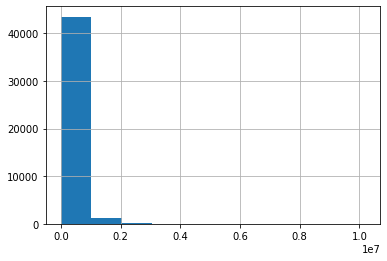

In [ ]:
train["sellin_channel_1"].hist()

In [ ]:
train["sellin_channel_1_bin"] = pd.qcut(train["sellin_channel_1"], 2, duplicates='drop')

In [ ]:
train.groupby("sellin_channel_1_bin")["sellin"].agg(["count", "mean"])

,count,mean
sellin_channel_1_bin,,
"(-0.001, 1013.0]",23871,23374.324662
"(1013.0, 10193819.0]",21036,500663.740825


In [ ]:
train["sellin_channel_2_bin"] = pd.qcut(train["sellin_channel_2"], 5, duplicates='drop')

In [ ]:
train.groupby("sellin_channel_2_bin")["sellin"].agg(["count", "mean"])

,count,mean
sellin_channel_2_bin,,
"(-0.001, 26338.0]",35957,86186.193259
"(26338.0, 3211210.0]",8950,892841.788268


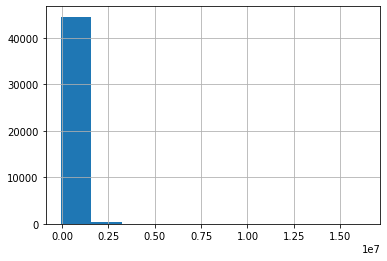

In [ ]:
train["sellout"].hist()

In [ ]:
train["sellout_bin"] = pd.qcut(train["sellout"], 5)

In [ ]:
train.groupby("sellout_bin")["sellin"].agg(["count", "mean"])

,count,mean
sellout_bin,,
"(-67871.001, 3039.0]",9518,21393.904392
"(3039.0, 19247.0]",8684,57652.694956
"(19247.0, 63819.0]",8798,106433.047624
"(63819.0, 198548.0]",8950,221461.833631
"(198548.0, 16346781.0]",8957,833668.237914


In [ ]:
train["sellin_channel_5_bin"] = pd.qcut(train["sellin_channel_5"], 6, duplicates="drop")

In [ ]:
train.groupby("sellin_channel_5_bin")["sellin"].agg(["count", "mean"])

,count,mean
sellin_channel_5_bin,,
"(-0.001, 1013.0]",37518,149313.062557
"(1013.0, 876245.0]",7389,742726.143592


In [ ]:
train["onhand_inventory_bin"] = pd.qcut(train["onhand_inventory"], 5)

In [ ]:
train.groupby("onhand_inventory_bin")["sellin"].agg(["count", "mean"])

,count,mean
onhand_inventory_bin,,
"(-17221.001, 15195.0]",8998,12462.894643
"(15195.0, 109404.0]",8999,25090.970997
"(109404.0, 354550.0]",8961,89900.273853
"(354550.0, 1141651.0]",8972,252402.295586
"(1141651.0, 16884684.0]",8977,855725.346107


In [ ]:
train.groupby("CAT_GENDER_BOTH")["sellin"].agg(["count", "mean"])

,count,mean
CAT_GENDER_BOTH,,
0,44339,250013.970026
1,568,8030.878521


In [ ]:
train.groupby("CAT_GENDER_MEN")["sellin"].agg(["count", "mean"])

,count,mean
CAT_GENDER_MEN,,
0,24787,235742.881753
1,20120,260764.023161


In [ ]:
train.groupby("CAT_GENDER_WOMEN")["sellin"].agg(["count", "mean"])

,count,mean
CAT_GENDER_WOMEN,,
0,20688,253825.100783
1,24219,241083.334200


In [ ]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [ ]:
phik_matrix = train.phik_matrix()

interval columns not set, guessing: ['starting_inventory', 'sellin', 'sellin_channel_1', 'sellin_channel_2', 'sellin_channel_3', 'sellin_channel_4', 'sellin_channel_5', 'sellin_channel_6', 'sellin_channel_7', 'sellin_channel_8', 'sellout', 'onhand_inventory', 'leftover_inventory', 'sellout_channel_1', 'sellout_channel_2', 'sellout_channel_3', 'sellout_channel_4', 'sellout_channel_5', 'sellout_channel_6', 'sellout_channel_7', 'sellout_channel_8', 'sellout_channel_9', 'sellout_channel_10', 'onhand_inventory_channel_1', 'onhand_inventory_channel_2', 'onhand_inventory_channel_3', 'onhand_inventory_channel_4', 'onhand_inventory_channel_5', 'onhand_inventory_channel_6', 'onhand_inventory_channel_7', 'onhand_inventory_channel_8', 'onhand_inventory_channel_9', 'onhand_inventory_channel_10', 'price', 'month', 'year', 'FLAG100', 'disc_month', 'cum_disc', 'CAT_GENDER_BOTH', 'CAT_GENDER_MEN', 'CAT_GENDER_WOMEN', 'Weeks']


/usr/local/lib/python3.7/dist-packages/phik/data_quality.py:62: UserWarning: The number of unique values of variable sku_name is large: 3868. Are you sure this is not an interval variable? Analysis for pairs of variables including sku_name can be slow.
  col, df[col].nunique()
/usr/local/lib/python3.7/dist-packages/phik/data_quality.py:74: UserWarning: Not enough unique value for variable onhand_inventory_channel_6 for analysis 1. Dropping this column
  col, df[col].nunique()


In [ ]:
phik_matrix["sellin"].sort_values(ascending=False)

sellin                         1.000000
sellin_channel_1               0.882662
onhand_inventory               0.834176
leftover_inventory             0.801268
onhand_inventory_channel_1     0.782640
onhand_inventory_channel_10    0.662768
sellout                        0.645514
sellout_channel_1              0.645019
sellin_channel_7               0.641211
sellin_channel_2_bin           0.549477
sellout_channel_3              0.545948
sellout_channel_10             0.545501
sellout_channel_7              0.531235
onhand_inventory_channel_5     0.495890
sellin_channel_2               0.491330
sellout_channel_5              0.485180
sellin_channel_5               0.474815
onhand_inventory_bin           0.461788
onhand_inventory_channel_7     0.442320
sellout_bin                    0.434894
sellin_channel_3               0.414393
onhand_inventory_channel_9     0.400421
starting_inventory             0.397204
sellin_channel_5_bin           0.388799
sellout_channel_2              0.384639


In [ ]:
sellin_lists = []

for i in train.columns:
  if "sellin_channel" in i:
    sellin_lists.append(i)

In [ ]:
sellin_lists.remove("sellin_channel_1_bin")

In [ ]:
sellin_lists.remove("sellin_channel_2_bin")

In [ ]:
sellin_lists.remove("sellin_channel_5_bin")

In [ ]:
sellin_lists

['sellin_channel_1',
 'sellin_channel_2',
 'sellin_channel_3',
 'sellin_channel_4',
 'sellin_channel_5',
 'sellin_channel_6',
 'sellin_channel_7',
 'sellin_channel_8']

In [ ]:
sellout_lists = []

for i in train.columns:
  if "sellout_channel" in i:
    sellout_lists.append(i)

In [ ]:
sellout_lists

['sellout_channel_1',
 'sellout_channel_2',
 'sellout_channel_3',
 'sellout_channel_4',
 'sellout_channel_5',
 'sellout_channel_6',
 'sellout_channel_7',
 'sellout_channel_8',
 'sellout_channel_9',
 'sellout_channel_10']

In [ ]:
onhand_inventory_channel_lists = []

for i in train.columns:
  if "onhand_inventory_channel" in i:
    onhand_inventory_channel_lists.append(i)

In [ ]:
onhand_inventory_channel_lists

['onhand_inventory_channel_1',
 'onhand_inventory_channel_2',
 'onhand_inventory_channel_3',
 'onhand_inventory_channel_4',
 'onhand_inventory_channel_5',
 'onhand_inventory_channel_6',
 'onhand_inventory_channel_7',
 'onhand_inventory_channel_8',
 'onhand_inventory_channel_9',
 'onhand_inventory_channel_10']

In [ ]:
train[sellin_lists]

,sellin_channel_1,sellin_channel_2,sellin_channel_3,sellin_channel_4,sellin_channel_5,sellin_channel_6,sellin_channel_7,sellin_channel_8
0,0,0,0,1013,0,0,0,0
1,0,0,0,2026,0,0,0,0
2,0,0,0,1013,0,0,0,0
3,4052,40520,240081,4052,6078,18234,0,0
4,2026,0,81040,3039,25325,18234,0,0
...,...,...,...,...,...,...,...,...
44902,101300,10130,0,0,0,1013,0,9117
44903,6078,0,0,0,0,4052,0,21273
44904,0,0,0,24312,0,14182,0,0
44905,1013,0,0,1013,0,6078,0,21273


In [ ]:
train["sellin_fetuare"] = train["sellin_channel_1"] + train["sellin_channel_2"] + train["sellin_channel_3"] + train["sellin_channel_4"] + train["sellin_channel_5"] + train["sellin_channel_6"] + train["sellin_channel_7"] + train["sellin_channel_8"]

In [ ]:
train["sellin_fetuare"]

0          1013
1          2026
2          1013
3        313017
4        129664
          ...  
44902    121560
44903     31403
44904     38494
44905     29377
44906     18234
Name: sellin_fetuare, Length: 44907, dtype: int64

In [ ]:
train["sellout_fetuare"] = train["sellout_channel_1"] + train["sellout_channel_2"] + train["sellout_channel_3"] + train["sellout_channel_4"] + train["sellout_channel_5"] + train["sellout_channel_6"] + train["sellout_channel_7"] + train["sellout_channel_8"] + train["sellout_channel_9"] + train["sellout_channel_10"]

In [ ]:
train["onhand_inventory_channel_fetuare"] = train["onhand_inventory_channel_1"] + train["onhand_inventory_channel_2"] + train["onhand_inventory_channel_3"] + train["onhand_inventory_channel_4"] + train["onhand_inventory_channel_5"] + train["onhand_inventory_channel_6"] + train["onhand_inventory_channel_7"] + train["onhand_inventory_channel_8"] + train["onhand_inventory_channel_9"] + train["onhand_inventory_channel_10"]

In [ ]:
phik_matrix = train.phik_matrix()

interval columns not set, guessing: ['starting_inventory', 'sellin', 'sellin_channel_1', 'sellin_channel_2', 'sellin_channel_3', 'sellin_channel_4', 'sellin_channel_5', 'sellin_channel_6', 'sellin_channel_7', 'sellin_channel_8', 'sellout', 'onhand_inventory', 'leftover_inventory', 'sellout_channel_1', 'sellout_channel_2', 'sellout_channel_3', 'sellout_channel_4', 'sellout_channel_5', 'sellout_channel_6', 'sellout_channel_7', 'sellout_channel_8', 'sellout_channel_9', 'sellout_channel_10', 'onhand_inventory_channel_1', 'onhand_inventory_channel_2', 'onhand_inventory_channel_3', 'onhand_inventory_channel_4', 'onhand_inventory_channel_5', 'onhand_inventory_channel_6', 'onhand_inventory_channel_7', 'onhand_inventory_channel_8', 'onhand_inventory_channel_9', 'onhand_inventory_channel_10', 'price', 'month', 'year', 'FLAG100', 'disc_month', 'cum_disc', 'CAT_GENDER_BOTH', 'CAT_GENDER_MEN', 'CAT_GENDER_WOMEN', 'Weeks', 'sellin_fetuare', 'sellout_fetuare', 'onhand_inventory_channel_fetuare']


/usr/local/lib/python3.7/dist-packages/phik/data_quality.py:62: UserWarning: The number of unique values of variable sku_name is large: 3868. Are you sure this is not an interval variable? Analysis for pairs of variables including sku_name can be slow.
  col, df[col].nunique()
/usr/local/lib/python3.7/dist-packages/phik/data_quality.py:74: UserWarning: Not enough unique value for variable onhand_inventory_channel_6 for analysis 1. Dropping this column
  col, df[col].nunique()


In [ ]:
phik_matrix["sellin"].sort_values(ascending=False)

sellin                              1.000000
sellin_fetuare                      0.998671
sellin_channel_1                    0.882662
onhand_inventory_channel_fetuare    0.834176
onhand_inventory                    0.834176
leftover_inventory                  0.801268
onhand_inventory_channel_1          0.782640
onhand_inventory_channel_10         0.662768
sellout_fetuare                     0.645514
sellout                             0.645514
sellout_channel_1                   0.645019
sellin_channel_7                    0.641211
sellin_channel_2_bin                0.549477
sellout_channel_3                   0.545948
sellout_channel_10                  0.545501
sellout_channel_7                   0.531235
onhand_inventory_channel_5          0.495890
sellin_channel_2                    0.491330
sellout_channel_5                   0.485180
sellin_channel_5                    0.474815
onhand_inventory_bin                0.461788
onhand_inventory_channel_7          0.442320
sellout_bi

In [ ]:
train["sellin_fetuare_bin"] = pd.qcut(train["sellin_fetuare"], 5)

In [ ]:
train.groupby("sellin_fetuare_bin")["sellin"].agg(["count", "mean"])

,count,mean
sellin_fetuare_bin,,
"(-1013.001, 1013.0]",9185,1.370886e+03
"(1013.0, 7091.0]",9248,4.160880e+03
"(7091.0, 55715.0]",8535,2.712454e+04
"(55715.0, 326186.0]",8977,1.706693e+05
"(326186.0, 11094376.0]",8962,1.034953e+06


In [ ]:
train["onhand_inventory_channel_fetuare_bin"] = pd.qcut(train["onhand_inventory_channel_fetuare"], 5)

In [ ]:
train.groupby("onhand_inventory_channel_fetuare_bin")["sellin"].agg(["count", "mean"])

,count,mean
onhand_inventory_channel_fetuare_bin,,
"(-17221.001, 15195.0]",8998,12462.894643
"(15195.0, 109404.0]",8998,25089.143699
"(109404.0, 354550.0]",8961,89900.273853
"(354550.0, 1141651.0]",8973,252378.795163
"(1141651.0, 16884684.0]",8977,855725.346107


In [ ]:
train["sellout_fetuare_bin"] = pd.qcut(train["sellout_fetuare"], 5)

In [ ]:
train.groupby("sellout_fetuare_bin")["sellin"].agg(["count", "mean"])

,count,mean
sellout_fetuare_bin,,
"(-67871.001, 3039.0]",9518,21393.904392
"(3039.0, 19247.0]",8684,57652.694956
"(19247.0, 63819.0]",8798,106433.047624
"(63819.0, 198548.0]",8950,221461.833631
"(198548.0, 16346781.0]",8957,833668.237914


In [ ]:
train = pd.read_csv("/content/Train.csv")

train["sellin_fetuare"] = train["sellin_channel_1"] + train["sellin_channel_2"] + train["sellin_channel_3"] + train["sellin_channel_4"] + train["sellin_channel_5"] + train["sellin_channel_6"] + train["sellin_channel_7"] + train["sellin_channel_8"]

train["sellout_fetuare"] = train["sellout_channel_1"] + train["sellout_channel_2"] + train["sellout_channel_3"] + train["sellout_channel_4"] + train["sellout_channel_5"] + train["sellout_channel_6"] + train["sellout_channel_7"] + train["sellout_channel_8"] + train["sellout_channel_9"] + train["sellout_channel_10"]

train["onhand_inventory_channel_fetuare"] = train["onhand_inventory_channel_1"] + train["onhand_inventory_channel_2"] + train["onhand_inventory_channel_3"] + train["onhand_inventory_channel_4"] + train["onhand_inventory_channel_5"] + train["onhand_inventory_channel_6"] + train["onhand_inventory_channel_7"] + train["onhand_inventory_channel_8"] + train["onhand_inventory_channel_9"] + train["onhand_inventory_channel_10"]

In [ ]:
result = sellin_lists + sellout_lists + onhand_inventory_channel_lists

In [ ]:
train = train.drop(columns=result, axis=1)

In [ ]:
phik_matrix = train.phik_matrix()

phik_matrix["sellin"].sort_values(ascending=False)

interval columns not set, guessing: ['starting_inventory', 'sellin', 'sellout', 'onhand_inventory', 'leftover_inventory', 'price', 'month', 'year', 'FLAG100', 'disc_month', 'cum_disc', 'CAT_GENDER_BOTH', 'CAT_GENDER_MEN', 'CAT_GENDER_WOMEN', 'Weeks', 'sellin_fetuare', 'sellout_fetuare', 'onhand_inventory_channel_fetuare']


/usr/local/lib/python3.7/dist-packages/phik/data_quality.py:62: UserWarning: The number of unique values of variable sku_name is large: 3868. Are you sure this is not an interval variable? Analysis for pairs of variables including sku_name can be slow.
  col, df[col].nunique()


sellin                              1.000000
sellin_fetuare                      0.998671
onhand_inventory_channel_fetuare    0.834176
onhand_inventory                    0.834176
leftover_inventory                  0.801268
sellout                             0.645514
sellout_fetuare                     0.645514
starting_inventory                  0.397204
product_lifecycle_stage             0.315866
disc_month                          0.113909
month                               0.106552
cum_disc                            0.095703
FLAG100                             0.093155
year                                0.074778
price                               0.064393
CAT_GENDER_BOTH                     0.032136
CAT_GENDER_MEN                      0.025732
CAT_GENDER_WOMEN                    0.019077
Weeks                               0.018468
sku_name                            0.000000
Name: sellin, dtype: float64

In [ ]:
train

,sku_name,starting_inventory,sellin,sellout,onhand_inventory,leftover_inventory,price,month,year,product_lifecycle_stage,FLAG100,disc_month,cum_disc,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,Weeks,sellin_fetuare,sellout_fetuare,onhand_inventory_channel_fetuare
0,YOSHWARDTERR,0,1013,1013,0,0,95,7,2016,U,0.000000,0,0,0,1,0,1,1013,1013,0
1,YOSHWARDTERR,0,2026,0,1013,2026,95,2,2017,U,0.000000,0,0,0,1,0,0,2026,0,1013
2,YOSHWARDTERR,0,1013,1013,0,0,95,5,2017,U,0.000000,0,0,0,1,0,0,1013,1013,0
3,YOSHUANEMARX,0,320108,56728,259328,263380,155,4,2018,W,0.270966,1,1,0,0,1,1,313017,56728,259328
4,YOSHUANEMARX,0,132703,90157,270471,42546,155,5,2018,W,0.063004,0,1,0,0,1,0,129664,90157,270471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44902,ABEAHAMASHL,432551,156002,25325,291744,130677,149,6,2021,W,0.000000,0,0,0,0,1,0,121560,25325,291744
44903,ABEAHAMASHL,406213,34442,38494,396083,-4052,149,7,2021,W,0.333333,0,0,0,0,1,0,31403,38494,396083
44904,ABEAHAMASHL,375823,38494,56728,274523,-18234,149,8,2021,W,0.400000,1,1,0,0,1,1,38494,56728,274523
44905,ABEAHAMASHL,400135,29377,65845,123586,-36468,149,9,2021,W,0.000000,0,1,0,0,1,0,29377,65845,123586


In [ ]:
train["product_lifecycle_stage"].value_counts()

U    16861
W    15837
N     3708
V     1749
O     1730
M     1657
L     1590
X      633
T      472
A      166
K      153
R      116
Z       87
Q       80
S       68
Name: product_lifecycle_stage, dtype: int64

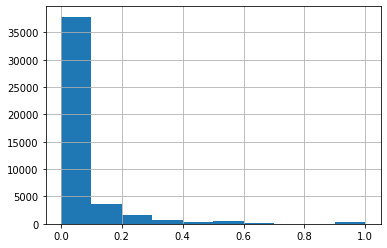

In [ ]:
train["FLAG100"].hist()

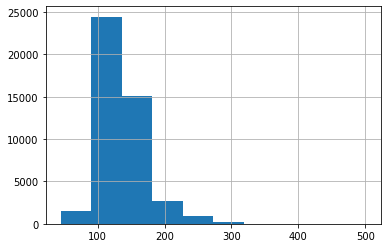

In [ ]:
train["price"].hist()

In [ ]:
train["price_bin"] = pd.qcut(train["price"], 5)

In [ ]:
train.groupby("price_bin")["sellin"].agg(["count", "mean"])

,count,mean
price_bin,,
"(44.999, 115.0]",11579,240742.743847
"(115.0, 125.0]",6805,290368.820867
"(125.0, 139.0]",8618,248406.924344
"(139.0, 155.0]",9238,261725.842715
"(155.0, 500.0]",8667,203971.003808


In [ ]:
train["leftover_inventory_bin"] = pd.qcut(train["leftover_inventory"], 5)

train.groupby("leftover_inventory_bin")["sellin"].agg(["count", "mean"])

,count,mean
leftover_inventory_bin,,
"(-9177780.001, -29377.0]",9062,118252.155926
"(-29377.0, -2026.0]",9528,23924.257452
"(-2026.0, 2026.0]",8370,6244.049701
"(2026.0, 141820.0]",8982,145845.496437
"(141820.0, 7865945.0]",8965,940115.186726


In [ ]:
train["disc_month"].value_counts()

0    39367
1     5540
Name: disc_month, dtype: int64

In [ ]:
train.groupby("disc_month")["sellin"].agg(["count", "mean"])

,count,mean
disc_month,,
0,39367,217081.136968
1,5540,459223.436282


In [ ]:
train.groupby("cum_disc")["sellin"].agg(["count", "mean"])

,count,mean
cum_disc,,
0,32561,196386.138970
1,12346,380317.664426


In [ ]:
train.groupby("year")["sellin"].agg(["count", "mean"])

,count,mean
year,,
2016,11874,253002.337965
2017,9241,297161.099989
2018,8331,242629.975993
2019,9554,229887.912811
2021,5907,189946.846284


In [ ]:
train.groupby("month")["sellin"].agg(["count", "mean"])

,count,mean
month,,
1,3490,238896.747851
2,3635,207923.057221
3,3690,235503.557724
4,3863,192777.859695
5,3655,188441.558140
6,4128,207393.590601
7,3539,205162.125742
8,3610,196578.121884
9,4031,332665.078641


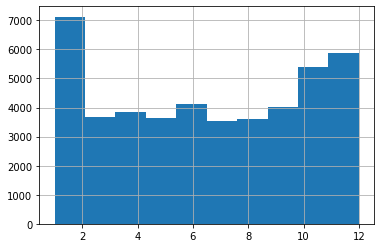

In [ ]:
train["month"].hist()

In [ ]:
train["Weeks"].value_counts()

0    29471
1    15436
Name: Weeks, dtype: int64

In [ ]:
train.groupby("Weeks")["sellin"].agg(["count", "mean"])

,count,mean
Weeks,,
0,29471,248907.309457
1,15436,243222.573141


In [ ]:
train = pd.read_csv("/content/Train.csv")

train["sellin_fetuare"] = train["sellin_channel_1"] + train["sellin_channel_2"] + train["sellin_channel_3"] + train["sellin_channel_4"] + train["sellin_channel_5"] + train["sellin_channel_6"] + train["sellin_channel_7"] + train["sellin_channel_8"]

train["sellout_fetuare"] = train["sellout_channel_1"] + train["sellout_channel_2"] + train["sellout_channel_3"] + train["sellout_channel_4"] + train["sellout_channel_5"] + train["sellout_channel_6"] + train["sellout_channel_7"] + train["sellout_channel_8"] + train["sellout_channel_9"] + train["sellout_channel_10"]

train["onhand_inventory_channel_fetuare"] = train["onhand_inventory_channel_1"] + train["onhand_inventory_channel_2"] + train["onhand_inventory_channel_3"] + train["onhand_inventory_channel_4"] + train["onhand_inventory_channel_5"] + train["onhand_inventory_channel_6"] + train["onhand_inventory_channel_7"] + train["onhand_inventory_channel_8"] + train["onhand_inventory_channel_9"] + train["onhand_inventory_channel_10"]

result = sellin_lists + sellout_lists + onhand_inventory_channel_lists

train = train.drop(columns=result, axis=1)

In [ ]:
train

,sku_name,starting_inventory,sellin,sellout,onhand_inventory,leftover_inventory,price,month,year,product_lifecycle_stage,FLAG100,disc_month,cum_disc,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,Weeks,sellin_fetuare,sellout_fetuare,onhand_inventory_channel_fetuare
0,YOSHWARDTERR,0,1013,1013,0,0,95,7,2016,U,0.000000,0,0,0,1,0,1,1013,1013,0
1,YOSHWARDTERR,0,2026,0,1013,2026,95,2,2017,U,0.000000,0,0,0,1,0,0,2026,0,1013
2,YOSHWARDTERR,0,1013,1013,0,0,95,5,2017,U,0.000000,0,0,0,1,0,0,1013,1013,0
3,YOSHUANEMARX,0,320108,56728,259328,263380,155,4,2018,W,0.270966,1,1,0,0,1,1,313017,56728,259328
4,YOSHUANEMARX,0,132703,90157,270471,42546,155,5,2018,W,0.063004,0,1,0,0,1,0,129664,90157,270471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44902,ABEAHAMASHL,432551,156002,25325,291744,130677,149,6,2021,W,0.000000,0,0,0,0,1,0,121560,25325,291744
44903,ABEAHAMASHL,406213,34442,38494,396083,-4052,149,7,2021,W,0.333333,0,0,0,0,1,0,31403,38494,396083
44904,ABEAHAMASHL,375823,38494,56728,274523,-18234,149,8,2021,W,0.400000,1,1,0,0,1,1,38494,56728,274523
44905,ABEAHAMASHL,400135,29377,65845,123586,-36468,149,9,2021,W,0.000000,0,1,0,0,1,0,29377,65845,123586


In [ ]:
a = pd.Series(train["onhand_inventory"]).tolist()

b = pd.Series(train["onhand_inventory_channel_fetuare"]).tolist()

In [ ]:
diff = np.mean( a != b )

In [ ]:
diff

1.0

In [ ]:
train["diff"] = np.abs(train["sellout_fetuare"] - train["sellin_fetuare"])

In [ ]:
phik_matrix = train.phik_matrix()

phik_matrix["sellin"].sort_values(ascending=False)

interval columns not set, guessing: ['starting_inventory', 'sellin', 'sellout', 'onhand_inventory', 'leftover_inventory', 'price', 'month', 'year', 'FLAG100', 'disc_month', 'cum_disc', 'CAT_GENDER_BOTH', 'CAT_GENDER_MEN', 'CAT_GENDER_WOMEN', 'Weeks', 'sellin_fetuare', 'sellout_fetuare', 'onhand_inventory_channel_fetuare', 'diff']


/usr/local/lib/python3.7/dist-packages/phik/data_quality.py:62: UserWarning: The number of unique values of variable sku_name is large: 3868. Are you sure this is not an interval variable? Analysis for pairs of variables including sku_name can be slow.
  col, df[col].nunique()


sellin                              1.000000
sellin_fetuare                      0.998671
onhand_inventory                    0.834176
onhand_inventory_channel_fetuare    0.834176
leftover_inventory                  0.801268
diff                                0.785219
sellout                             0.645514
sellout_fetuare                     0.645514
starting_inventory                  0.397204
product_lifecycle_stage             0.315866
disc_month                          0.113909
month                               0.106552
cum_disc                            0.095703
FLAG100                             0.093155
year                                0.074778
price                               0.064393
CAT_GENDER_BOTH                     0.032136
CAT_GENDER_MEN                      0.025732
CAT_GENDER_WOMEN                    0.019077
Weeks                               0.018468
sku_name                            0.000000
Name: sellin, dtype: float64

In [ ]:
train["inventory_feature"] = np.abs(train["starting_inventory"] - (train["leftover_inventory"] + train["onhand_inventory"]))

In [ ]:
phik_matrix = train.phik_matrix()

phik_matrix["sellin"].sort_values(ascending=False)

interval columns not set, guessing: ['starting_inventory', 'sellin', 'sellout', 'onhand_inventory', 'leftover_inventory', 'price', 'month', 'year', 'FLAG100', 'disc_month', 'cum_disc', 'CAT_GENDER_BOTH', 'CAT_GENDER_MEN', 'CAT_GENDER_WOMEN', 'Weeks', 'sellin_fetuare', 'sellout_fetuare', 'onhand_inventory_channel_fetuare', 'diff', 'inventory_feature']


/usr/local/lib/python3.7/dist-packages/phik/data_quality.py:62: UserWarning: The number of unique values of variable sku_name is large: 3868. Are you sure this is not an interval variable? Analysis for pairs of variables including sku_name can be slow.
  col, df[col].nunique()


sellin                              1.000000
sellin_fetuare                      0.998671
inventory_feature                   0.881347
onhand_inventory                    0.834176
onhand_inventory_channel_fetuare    0.834176
leftover_inventory                  0.801268
diff                                0.785219
sellout                             0.645514
sellout_fetuare                     0.645514
starting_inventory                  0.397204
product_lifecycle_stage             0.315866
disc_month                          0.113909
month                               0.106552
cum_disc                            0.095703
FLAG100                             0.093155
year                                0.074778
price                               0.064393
CAT_GENDER_BOTH                     0.032136
CAT_GENDER_MEN                      0.025732
CAT_GENDER_WOMEN                    0.019077
Weeks                               0.018468
sku_name                            0.000000
Name: sell

In [ ]:
train

,sku_name,starting_inventory,sellin,sellout,onhand_inventory,leftover_inventory,price,month,year,product_lifecycle_stage,FLAG100,disc_month,cum_disc,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,Weeks,sellin_fetuare,sellout_fetuare,onhand_inventory_channel_fetuare,diff,inventory_feature
0,YOSHWARDTERR,0,1013,1013,0,0,95,7,2016,U,0.000000,0,0,0,1,0,1,1013,1013,0,0,0
1,YOSHWARDTERR,0,2026,0,1013,2026,95,2,2017,U,0.000000,0,0,0,1,0,0,2026,0,1013,2026,3039
2,YOSHWARDTERR,0,1013,1013,0,0,95,5,2017,U,0.000000,0,0,0,1,0,0,1013,1013,0,0,0
3,YOSHUANEMARX,0,320108,56728,259328,263380,155,4,2018,W,0.270966,1,1,0,0,1,1,313017,56728,259328,256289,522708
4,YOSHUANEMARX,0,132703,90157,270471,42546,155,5,2018,W,0.063004,0,1,0,0,1,0,129664,90157,270471,39507,313017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44902,ABEAHAMASHL,432551,156002,25325,291744,130677,149,6,2021,W,0.000000,0,0,0,0,1,0,121560,25325,291744,96235,10130
44903,ABEAHAMASHL,406213,34442,38494,396083,-4052,149,7,2021,W,0.333333,0,0,0,0,1,0,31403,38494,396083,7091,14182
44904,ABEAHAMASHL,375823,38494,56728,274523,-18234,149,8,2021,W,0.400000,1,1,0,0,1,1,38494,56728,274523,18234,119534
44905,ABEAHAMASHL,400135,29377,65845,123586,-36468,149,9,2021,W,0.000000,0,1,0,0,1,0,29377,65845,123586,36468,313017


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Preprocessing**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

label = LabelEncoder()
scaler = MinMaxScaler()
pca = PCA()

In [ ]:
train["product_lifecycle_stage"] = label.fit_transform(train["product_lifecycle_stage"])
train = train.drop(columns=["sku_name"], axis=1)

In [ ]:
for i in train.columns:
  train[i] = scaler.fit_transform(np.array(train[i]).reshape(-1,1))

In [ ]:
train

,starting_inventory,sellin,sellout,onhand_inventory,leftover_inventory,price,month,year,product_lifecycle_stage,FLAG100,disc_month,cum_disc,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,Weeks,sellin_fetuare,sellout_fetuare,onhand_inventory_channel_fetuare,diff,inventory_feature
0,0.000000,0.000178,0.004196,0.001019,0.538484,0.109890,0.545455,0.0,0.714286,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.000183,0.004196,0.001019,0.000000,0.000000
1,0.000000,0.000267,0.004135,0.001079,0.538603,0.109890,0.090909,0.2,0.714286,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000274,0.004135,0.001079,0.000215,0.000143
2,0.000000,0.000178,0.004196,0.001019,0.538484,0.109890,0.363636,0.2,0.714286,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000183,0.004196,0.001019,0.000000,0.000000
3,0.000000,0.028175,0.007591,0.016362,0.553938,0.241758,0.272727,0.4,0.857143,0.270966,1.0,1.0,0.0,0.0,1.0,1.0,0.028303,0.007591,0.016362,0.027175,0.024578
4,0.000000,0.011732,0.009627,0.017021,0.540981,0.241758,0.363636,0.4,0.857143,0.063004,0.0,1.0,0.0,0.0,1.0,0.0,0.011778,0.009627,0.017021,0.004189,0.014718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44902,0.019323,0.013777,0.005678,0.018280,0.546152,0.228571,0.454545,1.0,0.857143,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.011047,0.005678,0.018280,0.010204,0.000476
44903,0.018146,0.003111,0.006480,0.024453,0.538247,0.228571,0.545455,1.0,0.857143,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.002922,0.006480,0.024453,0.000752,0.000667
44904,0.016789,0.003466,0.007591,0.017261,0.537415,0.228571,0.636364,1.0,0.857143,0.400000,1.0,1.0,0.0,0.0,1.0,1.0,0.003561,0.007591,0.017261,0.001933,0.005621
44905,0.017875,0.002666,0.008146,0.008331,0.536345,0.228571,0.727273,1.0,0.857143,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.002739,0.008146,0.008331,0.003867,0.014718


# **Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
X = train.drop(["sellin"], axis=1)

y = train["sellin"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=42)

In [ ]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

In [ ]:
rfr = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18, criterion="absolute_error")

In [ ]:
rfr.fit(X_reduced_train[:,:1], y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=5,
                      max_features='log2', n_estimators=300, random_state=18)

In [ ]:
y_pred = rfr.predict(X_reduced_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
mae

0.008924011692787804

**What can drop**

In [ ]:
# Если значение p_value больше за 0.05 то его можно дропнути

x_incl_const = sm.add_constant(X_train)

model_sm = sm.OLS(y_train, x_incl_const)

result = model_sm.fit()

pd.DataFrame({"coef": result.params, "p_value": round(result.pvalues, 3)})

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,coef,p_value
const,-7.726438e-01,1.0
starting_inventory,1.527525e-15,1.0
sellout,7.202436e-01,1.0
onhand_inventory,-2.735040e-15,1.0
leftover_inventory,1.495423e+00,0.0
price,-5.159982e-16,1.0
month,4.084291e-17,1.0
year,-8.456237e-17,1.0
product_lifecycle_stage,-2.967723e-16,1.0
FLAG100,-1.793972e-16,1.0


In [ ]:
result.bic

-1017670.9772748075

**VIF мультиколериальность**

In [ ]:
# має бути менше за 5 або 10

variance_inflation_factor(exog=x_incl_const.values, exog_idx=1)

vif = [variance_inflation_factor(exog=x_incl_const.values, exog_idx=1) for i in range(x_incl_const.shape[1])]

pd.DataFrame({"coef_name": x_incl_const.columns, "vif": np.round(vif, 2)})

,coef_name,vif
0,const,1.73
1,starting_inventory,1.73
2,sellout,1.73
3,onhand_inventory,1.73
4,leftover_inventory,1.73
5,price,1.73
6,month,1.73
7,year,1.73
8,product_lifecycle_stage,1.73
9,FLAG100,1.73


# **Test**

In [ ]:
test

,sku_name,month,year,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN
0,YOSHTLYNYOSHZZ,11,2021,0,1,0
1,YOSHTLYNYOSHZZ,12,2021,0,1,0
2,YOSHTLYNYOSHZZ,1,2022,0,1,0
3,YOSHTLYNYOSHZZ,2,2022,0,1,0
4,YOSHRENECARL,11,2021,0,0,1
...,...,...,...,...,...,...
1523,ABEENNEARMAZZ,2,2022,0,0,1
1524,ABEAHAMASHL,11,2021,0,0,1
1525,ABEAHAMASHL,12,2021,0,0,1
1526,ABEAHAMASHL,1,2022,0,0,1


In [ ]:
y_pred

array([0.00041611, 0.00416037, 0.00229076, 0.00047892, 0.02193449,
       0.00026827, 0.00070853, 0.00041167, 0.00041611, 0.10365538,
       0.01765325, 0.0005047 , 0.00023924, 0.00397979, 0.00209892,
       0.00229076, 0.00411934, 0.00040722, 0.00023213, 0.00769383,
       0.00042796, 0.00045877, 0.20713374, 0.07682665, 0.05822149,
       0.07429591, 0.00045877, 0.00021406, 0.00464744, 0.0029544 ])

In [ ]:
test["prediction"] = y_pred

ValueError: ignored